### Question 4 Tensorlfow 2 Stacked Denoising Autoencoder on Cifar10 dataset


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 4.1 (1) Tensorflow2 imports

In [2]:
# Your Code Here
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model 
from tensorflow.keras.layers import Dense, Input, ReLU

from tensorflow.keras.losses import binary_crossentropy 
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model,save_model

tf.__version__

'2.3.1'

#### Plot Images

In [3]:
def plot_images(imgs1,imgs2,size, n = 10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(imgs1[i].reshape(*size))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(imgs2[i].reshape(*size))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

#### 4.2 (2) Load Cifar10 training and test data, convert to float32 and scale (0,1)

In [4]:
# Your Code Here
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape,y_train.shape,X_test.shape,y_test.shape

X_train = X_train.astype('float32')  / 255
X_test = X_test.astype('float32') / 255

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

#### 4.3 (2) Autoencoders want a flat vector input

* Reshape data so each example is flattened,print the shapes

In [5]:
# Your Code Here
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))  # Shape for Model
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

#### 4.4 (2) Create Noisy input, use a noise factor of .3

In [6]:
# Your Code Here
noise_factor = 0.3
X_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

#### 4.5 (2) Call plot_images with clean and noisy test images, and a tuple with the dimensions of the image

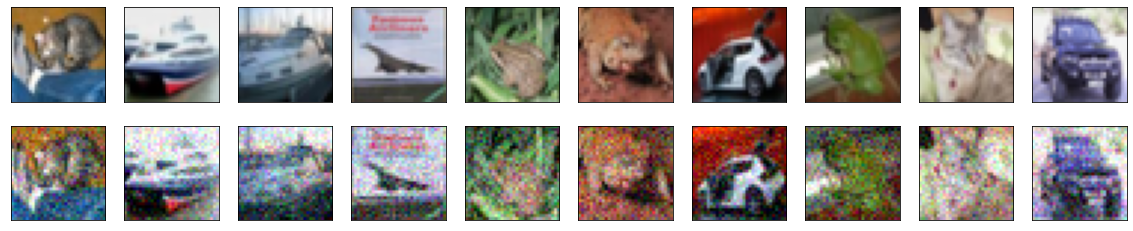

In [7]:
img_size = (32, 32, 3)
plot_images(X_test,X_test_noisy, img_size)

#### 4.6 (10) Create Autoencoder with at least 3 encoding and decoding layers, output model summary

* Try different Hidden layer sizes

In [11]:
# Your Code Here
input_size = 3072
hidden_size = 512
code_size = 32

input_img = Input(shape=(input_size,))
encoded = Dense(hidden_size, activation='relu')(input_img)
encoded = Dense(hidden_size / 2, activation='relu')(encoded)
encoded = Dense(hidden_size / 4, activation='relu')(encoded)

code = Dense(hidden_size / 8, activation='relu')(encoded)

decoded = Dense(hidden_size / 4, activation='relu')(code)
decoded = Dense(hidden_size / 2, activation='relu')(decoded)
decoded = Dense(hidden_size, activation='relu')(decoded)
decoded = Dense(input_size, activation='sigmoid')(decoded)

model = Model(input_img, decoded)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 256)              

#### 4.7 (2) Compile using Adam optimizer and binary_cross_entropy loss

In [12]:
# Your Code Here
model.compile(optimizer='adam', loss='binary_crossentropy')

#### 4.8 (2) Fit the model with training data and validation data, use batch size of  256

In [13]:
# Your Code Here
model.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20
196/196 [==============================] - 9s 47ms/step - loss: 0.6407 - val_loss: 0.6182
Epoch 2/20
196/196 [==============================] - 9s 44ms/step - loss: 0.6085 - val_loss: 0.6064
Epoch 3/20
196/196 [==============================] - 9s 44ms/step - loss: 0.6036 - val_loss: 0.6015
Epoch 4/20
196/196 [==============================] - 8s 42ms/step - loss: 0.5994 - val_loss: 0.5991
Epoch 5/20
196/196 [==============================] - 8s 43ms/step - loss: 0.5971 - val_loss: 0.5967
Epoch 6/20
196/196 [==============================] - 8s 42ms/step - loss: 0.5945 - val_loss: 0.5935
Epoch 7/20
196/196 [==============================] - 8s 42ms/step - loss: 0.5917 - val_loss: 0.5927
Epoch 8/20
196/196 [==============================] - 8s 42ms/step - loss: 0.5898 - val_loss: 0.5900
Epoch 9/20
196/196 [==============================] - 8s 43ms/step - loss: 0.5885 - val_loss: 0.5882
Epoch 10/20
196/196 [==============================] - 8s 42ms/step - loss: 0.5876 - val_lo

#### 4.9 (2) Predict the test images, plot the  test images and the predicted images

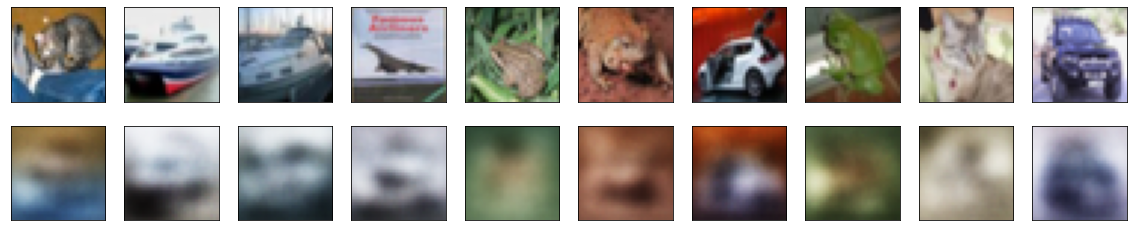

In [14]:
# Your Code Here
decoded_imgs = model.predict(X_test_noisy)
plot_images(X_test,decoded_imgs, img_size)